In [2]:
pip install -U fortran-magic

In [3]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [4]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

# Lists

In [5]:
assert ran_the_first_cell, "Oh noes!"

In [7]:
l = [5,6,7,"Buenos dias"]
l

[5, 6, 7, 'Buenos dias']

In [10]:
# Lists can be indexed like C-style arrays.
pri = l[0]
sec = l[1]
print("Primero:", pri)
print("Segundo:", sec)

Primero: 5
Segundo: 6


In [11]:
# Negative indexing gives elements relative to the end of the list.
ultimo = l[-1]
penul = l[-2]
print("Ultimo:", ultimo)
print("Penultimo:", penul)

Ultimo: Buenos dias
Penultimo: 7


In [12]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublista = l[1:2]
sublista

[6]

In [14]:
# l[:N] is equivalent to l[0:N].
primero_segundo = l[:2]
primero_segundo

[5, 6]

In [15]:
# l[3:] is equivalent to l[3:len(l)].
despues_segundo = l[2:]
despues_segundo

[7, 'Buenos dias']

In [16]:
# There's also a third parameter, "step", which gets every Nth element.
l = [1,2,3,4,5,6,7,8,9]
l[2:6:1]

[3, 4, 5, 6]

In [17]:
# This is a cute way to reverse a list.
l[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [18]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Antes:", l)
l.append('10')
print("Despues:", l)

Antes: [1, 2, 3, 4, 5]
Despues: [1, 2, 3, 4, 5, '10']


In [19]:
# Comprehensions let us perform elementwise computations.
l = [1,2,3,4,5,6,7,8,9]
[x * 2 for x in l]

[2, 4, 6, 8, 10, 12, 14, 16, 18]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [21]:
# Dictionaries are key-value mappings.
Capitales = {'Antioquia': 'Medellin', 'Huila': 'Neiva', "Valle del Cauca":'Cali'}
Capitales

{'Antioquia': 'Medellin', 'Huila': 'Neiva', 'Valle del Cauca': 'Cali'}

In [22]:
# Like lists, dictionaries are size-mutable.
Capitales['Tolima'] = 'Ibagué'
Capitales

{'Antioquia': 'Medellin',
 'Huila': 'Neiva',
 'Tolima': 'Ibagué',
 'Valle del Cauca': 'Cali'}

In [23]:
del Capitales['Tolima']
Capitales

{'Antioquia': 'Medellin', 'Huila': 'Neiva', 'Valle del Cauca': 'Cali'}

In [25]:
# No slicing.
Capitales['Tolima':'Ibague']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [37]:
# Suppose we have some matrices...
c = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

d = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [38]:
# Suppose we have some matrices...
a = [[4,3,2],
     [5,6,8],
     [1,9,7]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [39]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [40]:
%%time

matmul(a, b)

CPU times: user 41 µs, sys: 0 ns, total: 41 µs
Wall time: 45.5 µs


[[10, 17, 24, 31], [17, 28, 39, 50], [19, 29, 39, 49]]

In [41]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9919601238527984, 0.6399202143434216, 0.9283775820564306],
 [0.13612599315787832, 0.7006748082477136, 0.9475193768348104]]

In [42]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 8.07 s, sys: 9.08 ms, total: 8.08 s
Wall time: 8.1 s


In [43]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [44]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [45]:
list_data = [float(i) for i in range(200000)]
array_data = np.array(list_data)

In [46]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 15.6 ms


2666646666700000.0

In [47]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 364 µs, sys: 0 ns, total: 364 µs
Wall time: 404 µs


2666646666700000.0

## Why is the Python Version so Much Slower?

In [49]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [50]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([5,6,7,8], [2, 3 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[10, (18+0j), 21.0, 'fourfourfourfourfourfourfourfour']

In [51]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [52]:
import numpy as np

datos = np.array([5,6,7,8])
datos

array([5, 6, 7, 8])

In [ ]:
data + data

array([2, 4, 6, 8])

In [53]:
datos+datos

array([10, 12, 14, 16])

In [54]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.39 ms, sys: 1.14 ms, total: 2.53 ms
Wall time: 3.84 ms


2666646666700000.0

In [55]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.17 ms, sys: 1.03 ms, total: 2.2 ms
Wall time: 1.41 ms


2666646666700000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
datos.append(3)

In [62]:
# We **can** reshape an array though.
two_by_two = datos.reshape(2, 2)
two_by_two

array([[5, 6],
       [7, 8]])

In [64]:
# We **can** reshape an array though.
dos_x_dos = datos.reshape(2,2)
dos_x_dos

array([[5, 6],
       [7, 8]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [66]:
arr = np.array([4,6,7,3,6,8,6,3,1], dtype='int16').reshape(3, 3)
print("Arreglo:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Matriz:", arr.shape)
print("Strides:", arr.strides)
print("Datos:", arr.data.tobytes())

Arreglo:
[[4 6 7]
 [3 6 8]
 [6 3 1]]
DType: int16
Matriz: (3, 3)
Strides: (6, 2)
Datos: b'\x04\x00\x06\x00\x07\x00\x03\x00\x06\x00\x08\x00\x06\x00\x03\x00\x01\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [68]:
datos = np.arange(30).reshape(10, 3)
datos

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [69]:
# Binary operators.
datos * datos

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121],
       [144, 169, 196],
       [225, 256, 289],
       [324, 361, 400],
       [441, 484, 529],
       [576, 625, 676],
       [729, 784, 841]])

In [70]:
# Unary functions.
np.sqrt(datos)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712],
       [3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563],
       [4.24264069, 4.35889894, 4.47213595],
       [4.58257569, 4.69041576, 4.79583152],
       [4.89897949, 5.        , 5.09901951],
       [5.19615242, 5.29150262, 5.38516481]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [73]:
# Comparison operations
(datos % 2) == 0

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [74]:
# Boolean combinators.
((datos % 2) == 0) & ((datos % 3) == 0)

array([[ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [75]:
# as of python 3.5, @ is matrix-multiply
datos @ datos.T

array([[   5,   14,   23,   32,   41,   50,   59,   68,   77,   86],
       [  14,   50,   86,  122,  158,  194,  230,  266,  302,  338],
       [  23,   86,  149,  212,  275,  338,  401,  464,  527,  590],
       [  32,  122,  212,  302,  392,  482,  572,  662,  752,  842],
       [  41,  158,  275,  392,  509,  626,  743,  860,  977, 1094],
       [  50,  194,  338,  482,  626,  770,  914, 1058, 1202, 1346],
       [  59,  230,  401,  572,  743,  914, 1085, 1256, 1427, 1598],
       [  68,  266,  464,  662,  860, 1058, 1256, 1454, 1652, 1850],
       [  77,  302,  527,  752,  977, 1202, 1427, 1652, 1877, 2102],
       [  86,  338,  590,  842, 1094, 1346, 1598, 1850, 2102, 2354]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [116]:
sines = np.sin(np.linspace(0, 2 * np.pi, num=10))
cosines = np.sin(np.linspace(0, np.pi, num=10))

print("Senos", sines)

print("Cosenos", cosines)

Senos [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
Cosenos [0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]


In [117]:
print("sines[0]")
sines[0]

sines[0]


0.0

In [118]:
sines[:3]  # First three elements  

array([0.        , 0.64278761, 0.98480775])

In [119]:
sines[5:]  # Elements from 5 on.

array([-3.42020143e-01, -8.66025404e-01, -9.84807753e-01, -6.42787610e-01,
       -2.44929360e-16])

In [120]:
sines[::2]  # Every other element.

array([ 0.        ,  0.98480775,  0.34202014, -0.8660254 , -0.64278761])

In [121]:
print("Sines:\n", sines)
print("Sines >= 0:\n", (sines >= 0))
print("Sines[Sines >= 0]:\n", sines[sines >= 0])

Sines:
 [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
Sines >= 0:
 [ True  True  True  True  True False False False False False]
Sines[Sines >= 0]:
 [0.         0.64278761 0.98480775 0.8660254  0.34202014]


In [122]:
print(sines)
sines[[0,9,-1, 1, -9]]

[ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]


array([ 0.0000000e+00, -2.4492936e-16, -2.4492936e-16,  6.4278761e-01,
        6.4278761e-01])

In [125]:
unsortedData = np.array([0] * 13)
for i in range(13):
  unsortedData[i] = random.randint(-100,100)

In [126]:
indexSort = np.argsort(unsortedData)
indexSort

array([12,  3,  5, 10,  9,  6, 11,  1,  7,  8,  0,  2,  4])

In [128]:
unsortedData[indexSort]

array([-75, -69, -69, -61, -58, -54, -40,  -7,  16,  18,  42,  71,  73])

In [129]:
marketCaps = np.array([0] * 5)
for i in range(5):
  marketCaps[i] = random.randint(1,100)
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [130]:
sortByMarketCap = np.argsort(marketCaps)
assets[sortByMarketCap]

array(['B', 'D', 'E', 'C', 'A'], dtype='<U1')

In [131]:
import pandas as pd
from datetime import datetime

eventDates = pd.date_range(start="2020-04-09",end="2020-04-12")

eventValues = [0] * 6
for i in range(6):
  eventValues[i] = random.randint(1,24)
  

Calendar = pd.date_range(start="2020-04-01",end="2020-04-30")

print("Dates:\n", repr(eventDates))
print("Values:\n", repr(eventValues))
print("Calendar:\n", repr(Calendar))

Dates:
 DatetimeIndex(['2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12'], dtype='datetime64[ns]', freq='D')
Values:
 [22, 18, 5, 2, 9, 11]
Calendar:
 DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', freq='D')


In [132]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [133]:
data = np.arange(100,149).reshape(7,7)
data

array([[100, 101, 102, 103, 104, 105, 106],
       [107, 108, 109, 110, 111, 112, 113],
       [114, 115, 116, 117, 118, 119, 120],
       [121, 122, 123, 124, 125, 126, 127],
       [128, 129, 130, 131, 132, 133, 134],
       [135, 136, 137, 138, 139, 140, 141],
       [142, 143, 144, 145, 146, 147, 148]])

In [134]:
data[(data[:,0] % 2) != 0]

array([[107, 108, 109, 110, 111, 112, 113],
       [121, 122, 123, 124, 125, 126, 127],
       [135, 136, 137, 138, 139, 140, 141]])

In [135]:
data[3:, [0,-7]]

array([[121, 121],
       [128, 128],
       [135, 135],
       [142, 142]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [137]:
#Varianza
def variance(x):
  #np.mean => promedio
  #len(x) cantidad de elementos de la muestra
  return ((x - np.mean(x)) ** 2).sum() / len(x)

In [138]:
variance(np.random.standard_normal(100000))

1.007512635148134

In [139]:
data = np.array([None] * 55)

for i in range(55):
  data[i] = random.randint(-200,300)

data.mean()

58.63636363636363

In [143]:
data = data.reshape(5,11)
data

array([[101, -184, 197, -127, 232, -3, -185, -4, 59, 160, -66],
       [133, 176, 79, -189, 284, 197, 105, 25, 65, 6, -11],
       [35, 212, -186, 87, -4, -71, 168, 11, 129, 220, -26],
       [87, -51, 198, 25, 285, 58, -53, 262, 242, -157, 172],
       [290, 91, 12, -166, 243, -137, 242, 86, -139, 162, -152]],
      dtype=object)

In [144]:
#Promedio por columna
data.mean(axis=0)

array([129.2, 48.8, 60.0, -74.0, 208.0, 8.8, 55.4, 76.0, 71.2, 78.2,
       -16.6], dtype=object)

In [145]:
#Promedio por Fila
data.mean(axis=1)

array([16.363636363636363, 79.0909090909091, 52.27272727272727,
       97.0909090909091, 48.36363636363637], dtype=object)

# Broadcasting

In [146]:
row = np.array([None] * 5)
col = np.array([[1], [2], [3], [4]])

for i in range(5):
  row[i] = random.randint(1,15)

print("Row:\n", row, sep='')
print("Col:\n", col, sep='')

Row:
[15 13 6 8 3]
Col:
[[1]
 [2]
 [3]
 [4]]


In [86]:
Fila = np.array([10,20,30,40])
Columna = np.array([[5], [2], [1]])
print("Fila:\n", Fila, sep='')
print("Columna:\n", Columna, sep='')

Fila:
[10 20 30 40]
Columna:
[[5]
 [2]
 [1]]


In [87]:
Fila + Columna

array([[15, 25, 35, 45],
       [12, 22, 32, 42],
       [11, 21, 31, 41]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

# Selection in Pandas

In [102]:
s = pd.Series(index=['n','e','i','v','a'], data=[8,7,5,2,1])
s

n    8
e    7
i    5
v    2
a    1
dtype: int64

In [103]:
# There are two pieces to a Series: the index and the values.
print("El indice es:", s.index)
print("Los valores son:", s.values)

El indice es: Index(['n', 'e', 'i', 'v', 'a'], dtype='object')
Los valores son: [8 7 5 2 1]


In [104]:
# We can look up values out of a Series by position...
s.iloc[0]

8

In [105]:
# ... or by label.
s.loc['a']

1

In [106]:
# Slicing works as expected...
s.iloc[:2]

n    8
e    7
dtype: int64

In [109]:
# ...but it works with labels too!
s.loc[:'v']

n    8
e    7
i    5
v    2
dtype: int64

In [110]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

n    8
a    1
dtype: int64

In [111]:
# As does boolean masking.
s.loc[s > 2]

n    8
e    7
i    5
dtype: int64

In [112]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [97]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [113]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
c     0.0
d     0.0
e     0.0
i     0.0
n     0.0
v     0.0
z     0.0
dtype: float64

In [ ]:
import pandas as pd

TSLA = pd.read_csv('EPD.csv', parse_dates=['Date'], index_col= 'Date')
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
EDP.iloc[:3,:3]

,Open,High,Low
Date,,,
2010-06-29,19.000000,25.00,17.540001
2010-06-30,25.790001,30.42,23.299999
2010-07-01,25.000000,25.92,20.270000


In [ ]:
EPD.loc[pd.Timestamp('2011-09-01'):pd.Timestamp('2012-09-01')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-09-01,24.660000,24.870001,23.840000,24.000000,24.000000,848100
2011-09-02,23.660000,23.990000,22.680000,23.070000,23.070000,769900
2011-09-06,22.500000,23.200001,22.290001,22.940001,22.940001,809800
2011-09-07,23.389999,24.000000,23.280001,23.840000,23.840000,459200
2011-09-08,23.580000,24.030001,23.280001,23.610001,23.610001,505700
...,...,...,...,...,...,...
2012-08-27,29.570000,29.700001,28.170000,28.320000,28.320000,1350400
2012-08-28,28.400000,29.379999,28.000000,28.690001,28.690001,1402700
2012-08-29,28.490000,28.639999,28.020000,28.410000,28.410000,838900


In [ ]:
EPD.rolling(3)[['Close', 'Adj Close']].mean()

,Close,Adj Close
Date,,
2010-06-29,NaN,NaN
2010-06-30,NaN,NaN
2010-07-01,23.226666,23.226666
2010-07-02,21.663333,21.663333
2010-07-06,19.090000,19.090000
...,...,...
2020-04-03,472.013336,472.013336
2020-04-06,483.573334,483.573334
2020-04-07,513.900004,513.900004


In [ ]:
EPD.rolling(3)

Rolling [window=3,center=False,axis=0]

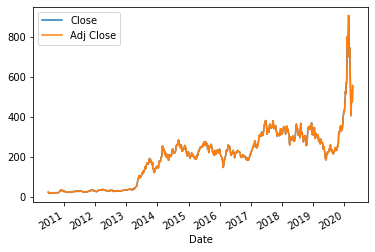

In [ ]:
EPD.rolling(3)[['Close', 'Adj Close']].mean().plot()

In [ ]:
EPD.drop('Volume', axis=1).resample('2W').mean()

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-07-04,23.197500,26.110000,19.955000,22.220000,22.220000
2010-07-18,18.226667,19.078889,17.071111,18.036666,18.036666
2010-08-01,20.950000,21.271000,20.252000,20.723000,20.723000
2010-08-15,19.931000,20.167000,19.274000,19.662000,19.662000
2010-08-29,19.133000,19.637000,18.809000,19.327000,19.327000
...,...,...,...,...,...
2020-02-16,768.609998,819.090997,742.278003,781.577008,781.577008
2020-03-01,823.803331,843.726671,793.288893,815.079990,815.079990
2020-03-15,677.490009,695.659003,640.409998,666.137994,666.137994


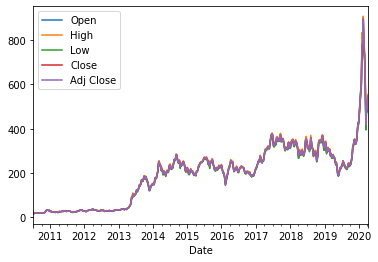

In [ ]:
EPD.drop('Volume', axis=1).resample('1W').mean().plot()

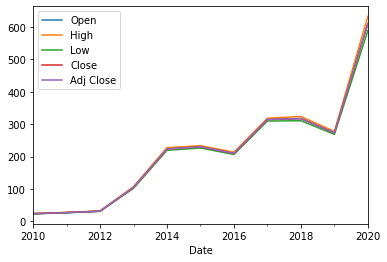

In [ ]:
EPD.drop('Volume', axis=1).resample('1A').mean().plot()

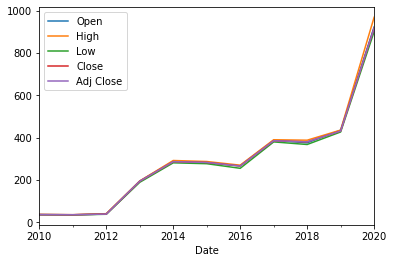

In [ ]:
TSLA.drop('Volume', axis=1).resample('1A').max().plot()

In [ ]:
EPD['Close'].pct_change().ewm(span=30).std()

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01    0.053713
2010-07-02    0.061803
2010-07-06    0.067734
                ...   
2020-04-03    0.082234
2020-04-06    0.082024
2020-04-07    0.080566
2020-04-08    0.077925
2020-04-09    0.076024
Name: Close, Length: 2463, dtype: float64

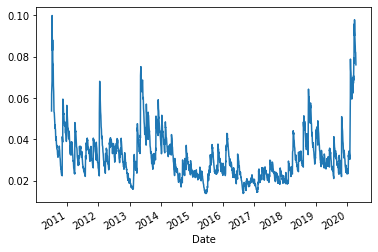

In [ ]:
EPD['Close'].pct_change().ewm(span=30).std().plot()